**1. A set of one-dimensional data points is given to you: 5, 10, 15, 20, 25, 30, 35. Assume that k = 2 and that the first set of random centroid is 15, 32, and that the second set is 12, 30.**

**a) Using the k-means method, create two clusters for each set of centroid described above.**

In [2]:
import numpy as np
from sklearn.cluster import KMeans

# Given data points
data_points = np.array([5, 10, 15, 20, 25, 30, 35])

# First set of initial centroids
initial_centroids_set1 = np.array([[15], [32]])

# Second set of initial centroids
initial_centroids_set2 = np.array([[12], [30]])

# Perform k-means clustering and create clusters
def perform_k_means(data, initial_centroids):
    kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1)
    kmeans.fit(data.reshape(-1, 1))
    labels = kmeans.labels_
    return labels

# Create clusters for each set of initial centroids
clusters_set1 = perform_k_means(data_points, initial_centroids_set1)
clusters_set2 = perform_k_means(data_points, initial_centroids_set2)

print("Clusters for First Set of Initial Centroids:")
print(clusters_set1)

print("\nClusters for Second Set of Initial Centroids:")
print(clusters_set2)

Clusters for First Set of Initial Centroids:
[0 0 0 0 1 1 1]

Clusters for Second Set of Initial Centroids:
[0 0 0 0 1 1 1]


**b) For each set of centroid values, calculate the SSE.**

In [3]:
def calculate_sse(data, centroids, labels):
    sse = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        squared_distances = np.sum((cluster_points - centroids[i])**2)
        sse += squared_distances
    return sse

# Calculate SSE for each set of clusters
sse_set1 = calculate_sse(data_points, initial_centroids_set1, clusters_set1)
sse_set2 = calculate_sse(data_points, initial_centroids_set2, clusters_set2)

print("\nSSE for First Set of Initial Centroids:", sse_set1)
print("SSE for Second Set of Initial Centroids:", sse_set2)


SSE for First Set of Initial Centroids: 212
SSE for Second Set of Initial Centroids: 176


**2. Describe how the Market Basket Research makes use of association analysis concepts.**

**Ans:** Market Basket Analysis employs association analysis concepts to identify patterns in transactional data, revealing products frequently purchased together. It involves generating frequent itemsets, creating association rules, and using metrics like support, confidence, and lift. These rules offer insights into customer behavior, aiding retailers in improving product placement, promotions, and cross-selling. By analyzing relationships between items, businesses can optimize strategies and enhance customer experiences.

**3. Give an example of the Apriori algorithm for learning association rules.**

**Ans:** The Apriori algorithm using a concise example: Grocery Store Transactions

Given transactions:

    - Bread, Milk, Eggs
    - Milk, Diapers, Beer
    - Bread, Milk, Diapers, Beer
    - Bread, Diapers, Beer
    - Bread, Milk

Apriori Steps:

1. Generate frequent itemsets based on a support threshold (e.g., 40%):
    - Frequent 1-itemsets: Bread, Milk, Diapers, Beer
    - Frequent 2-itemsets: Bread-Milk, Bread-Diapers, Bread-Beer, Milk-Diapers, Milk-Beer, Diapers-Beer
2. Generate association rules with a confidence threshold (e.g., 60%):
    - Example rule: Bread -> Diapers (Confidence: 100%, Support: 3)
    - Example rule: Milk -> Bread (Confidence: 66.67%, Support: 2)
3. Apply filters to keep significant rules (e.g., confidence > 70%).

In this scenario, the Apriori algorithm helps discover rules like "Bread -> Diapers" and "Milk -> Bread," guiding store strategies for product placement and promotions.

**4. In hierarchical clustering, how is the distance between clusters measured? Explain how this metric is used to decide when to end the iteration.**

**Ans:** In hierarchical clustering, the distance between clusters is determined by various linkage criteria, which define how the dissimilarity or similarity between clusters is calculated. These linkage criteria include single linkage (minimum distance), complete linkage (maximum distance), average linkage (average distance), centroid linkage (distance between cluster centroids), and Ward's linkage (minimizing variance increase upon merging). These metrics quantify the relationships between clusters based on the pairwise distances between their constituent data points.

The decision to end the iteration in hierarchical clustering is often guided by dendrogram analysis. A dendrogram visually represents the merging process, with clusters linked at different heights on the y-axis. By observing the dendrogram, you can determine where to cut it to achieve a specific number of clusters. This is a critical step in the process of hierarchical clustering as it directly influences the results.

The "elbow method" is a common approach to deciding the number of clusters. It involves looking for an "elbow point" on a plot of distances against the number of clusters. This point indicates diminishing returns, suggesting an optimal number of clusters. However, this method may not always provide a definitive answer, especially for complex datasets.

**5. In the k-means algorithm, how do you recompute the cluster centroids?**

**Ans:** In the k-means algorithm, cluster centroids are recomputed iteratively. After assigning data points to their nearest centroids, the centroids are updated using the mean of the assigned points. This process continues until convergence, refining cluster positions for optimal clustering.

**6. At the start of the clustering exercise, discuss one method for determining the required number of clusters.**

**Ans:** At the start of clustering, the Elbow Method is a common technique for estimating the ideal number of clusters. It involves plotting the sum of squared distances against cluster count. The point where the plot forms an "elbow" indicates a suitable cluster count, balancing compactness and avoiding overfitting. While this approach is helpful, complex datasets might not yield a clear elbow. Additional methods like silhouette analysis and cross-validation can provide more insight into determining the optimal cluster number.

**7. Discuss the k-means algorithm's advantages and disadvantages.**

**Ans:** 

**Advantages of the k-means Algorithm:**

1. Simple and Fast: K-means is computationally efficient and easy to implement. It works well on large datasets and can handle moderate numbers of clusters.
2. Scalability: K-means can be applied to datasets with a large number of dimensions, making it suitable for high-dimensional data.
3. Clustering Quality: It often yields reasonable results when data clusters are well-separated and evenly sized.
4. Interpretability: The resulting cluster centroids can have meaningful interpretations, aiding in understanding data patterns.
5. Applicability: K-means is widely used in various fields, from customer segmentation in marketing to image compression in computer science.

**Disadvantages of the k-means Algorithm:**

1. Sensitive to Initialization: Different initializations can lead to different results. Convergence to a local minimum is possible, requiring multiple runs with different initializations. 
2. Assumption of Circular Clusters: K-means assumes that clusters are spherical and equally sized, making it less effective for clusters with irregular shapes. 
3. Dependence on Number of Clusters: The number of clusters (k) needs to be specified in advance, which might not always be known.
4. Outliers Influence: Outliers can significantly affect the cluster centroids and lead to suboptimal results. 
5. Non-Convex Clusters: It struggles with clusters of non-convex shapes, as it's designed to minimize squared distances. 
6. Sensitive to Scaling: K-means is sensitive to the scaling of features; features with larger scales can dominate the distance computation.
7. Cannot Handle Categorical Data: It's not designed to handle categorical data directly; preprocessing is needed.

**8. Draw a diagram to demonstrate the principle of clustering.**

**Ans:** 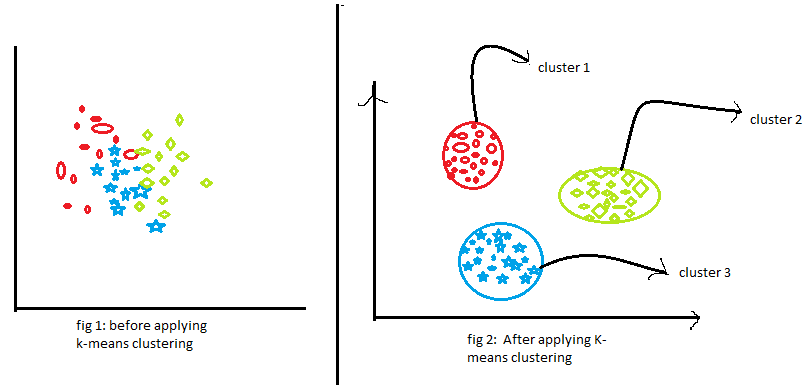    

**9. During your study, you discovered seven findings, which are listed in the data points below. Using the K-means algorithm, you want to build three clusters from these observations. The clusters C1, C2, and C3 have the following findings after the first iteration:**

**C1: (2,2), (4,4), (6,6); C2: (2,2), (4,4), (6,6); C3: (2,2), (4,4),**

**C2: (0,4), (4,0), (0,4), (0,4), (0,4), (0,4), (0,4), (0,4), (0,**

**C3: (5,5) and (9,9)**


In [5]:
import numpy as np
from sklearn.cluster import KMeans

# Data points for each cluster
C1_points = np.array([[2, 2], [4, 4], [6, 6]])
C2_points = np.array([[0, 4], [4, 0], [0, 4], [0, 4], [0, 4], [0, 4], [0, 4], [0, 4], [0, 4]])
C3_points = np.array([[5, 5], [9, 9]])

# Stack data points for clustering
data_points = np.vstack((C1_points, C2_points, C3_points))

# Number of clusters
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(data_points)

# Get cluster assignments and centroids
cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print results
for i in range(n_clusters):
    cluster_points = data_points[cluster_assignments == i]
    print(f"Cluster {i + 1}:")
    print(cluster_points)
    print(f"Centroid {i + 1}:", centroids[i])
    print()

Cluster 1:
[[0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]
 [0 4]]
Centroid 1: [0. 4.]

Cluster 2:
[[6 6]
 [5 5]
 [9 9]]
Centroid 2: [6.66666667 6.66666667]

Cluster 3:
[[2 2]
 [4 4]
 [4 0]]
Centroid 3: [3.33333333 2.        ]



**What would the cluster centroids be if you were to run a second iteration? What would this clustering's SSE be?**

In [6]:
# Calculate SSE for the provided cluster centroids and data points
sse = 0
for i in range(n_clusters):
    cluster_points = data_points[cluster_assignments == i]
    centroid = centroids[i]
    squared_distances = np.sum((cluster_points - centroid) ** 2)
    sse += squared_distances

print("SSE for the clustering:", sse)


SSE for the clustering: 28.0
